## The NOAO Lab (B-40) contains a Ekspla NT-242 tunable laser with a range from 300 to 2600 nm. This notebook calculates the maximum permissible exposures (MPE) to the laser and applications. It also calculates the required eyewear requirements
### The lab setup provides three scenarios how where laser exposure can occur. 
#### Scenario 1 is inside the laser bench where direct collimated beam exposure is possible.
#### Scenario 2 is where the light exits the fiber in the direction of the reflector
#### Scenario 3 is the ambient space in the room, where the only exposure is diffuse reflection.
#### Scenario 4 is the output of the Collimated Beam Projector

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pdb
from occular_intra_beam_MPE_calcs import occular_intra_beam_MPE_calcs
from skin_intra_beam_MPE_calcs import skin_intra_beam_MPE_calcs

In [5]:
nt242_data = np.genfromtxt('Laser_power_data/PGD151_NT242.txt',
                          delimiter='',comments='#') # wavelength [nm], Transmission

nt242_wave_nm = nt242_data[21::,0]
nt242_energy_J = nt242_data[21::,1]*1e-6
#get maximum pulse energy from vendor provided data
ind=nt242_energy_J.argmax()
max_pulse_energy_J=nt242_energy_J[ind] # 513 mJ
max_pulse_energy_wavelengh_nm = nt242_wave_nm[ind] # 420 nm

In [6]:
# Ekspla laser specifications
pulse_duration = 3e-9 # Actually 3-6 nanoseconds, assuming 3 as the worst case
pulse_frequency = 1000.0 # 1000 Hz
min_wavelength_nm = 300 # nm
max_wavelength_nm = 2600 # nm
# beam diameter is 2.5 mm at 450nm at 1/e^2, but laser safety calculations use 
# 1/e (Pg 169 (LSOT guide) shows that the D_(1/e) = D_(1/e^2) / sqrt(2))
beam_diameter_mm = 2.5 /np.sqrt(2.0) # 1.77 mm
print("The 1/e beam diameter is %0.3f [mm]" % beam_diameter_mm)
laser_energy_density = nt242_energy_J / (np.pi * (beam_diameter_mm/2/10)**2) # J/cm2
max_energy_density = max_pulse_energy_J / (np.pi * (beam_diameter_mm/2/10)**2) # 0.0196 J/cm2 
print("The maximum energy density of a single pulse is %0.4f [J/cm2]" % max_energy_density)
max_average_power_W = max_pulse_energy_J * pulse_frequency # watts
print("The maximum average power is %0.3f [W]" % max_average_power_W)
beam_divergence_rad = 1e-3 # 1mrad --> Value not published, but old datasheet shows <2 mrad, so assuming 1mrad

The 1/e beam diameter is 1.768 [mm]
The maximum energy density of a single pulse is 0.0209 [J/cm2]
The maximum average power is 0.513 [W]


## Calculation of Maximum Permissible Exposures (MPE) 

//anaconda/lib/python3.5/site-packages/matplotlib/scale.py:101: RuntimeWarning: invalid value encountered in less_equal
  a[a <= 0.0] = 1e-300


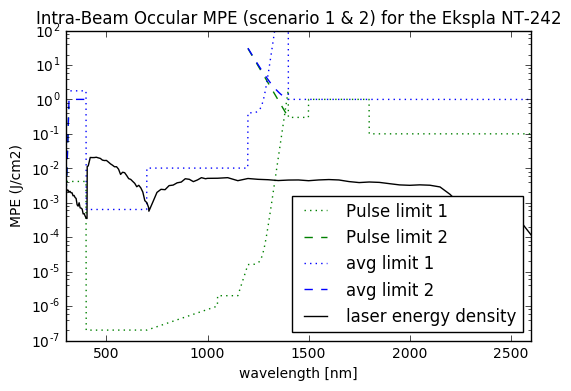

In [7]:
# get the MPEs in scenario 1 from the module
# modules were used to do calculations and ease reading.
MPEs_scenario1_intrabeam=occular_intra_beam_MPE_calcs()

if 1 == 1:
    plt.plot(MPEs_scenario1_intrabeam['wavelength'],MPEs_scenario1_intrabeam['MPE_pulse_limit1'],':g',label="Pulse limit 1")
    plt.plot(MPEs_scenario1_intrabeam['wavelength'],MPEs_scenario1_intrabeam['MPE_pulse_limit2'],'--g',label="Pulse limit 2")
    plt.plot(MPEs_scenario1_intrabeam['wavelength'],MPEs_scenario1_intrabeam['MPE_avg_limit1'],':b',label="avg limit 1")
    plt.plot(MPEs_scenario1_intrabeam['wavelength'],MPEs_scenario1_intrabeam['MPE_avg_limit2'],'--b',label="avg limit 2")
    plt.plot(nt242_wave_nm,laser_energy_density, '-k', label="laser energy density")
    #plt.plot(wavelength,spec_res_on_det,'-b',label="Det. Res Limit")
    #plt.plot(wavelength,spec_res_inst_on_det,'-r',label="Inst+Det. Res Limit")
    plt.title('Intra-Beam Occular MPE (scenario 1 & 2) for the Ekspla NT-242')
    plt.ylabel('MPE (J/cm2)')
    plt.xlabel('wavelength [nm]')
    #plt.text(3300, 430, 'Seeing is %.2f "' % seeing) 
    plt.legend(loc=4)
    plt.yscale('log')
    plt.ylim([1e-7,100])
    plt.xlim(300,2600)
    plt.show()
    plt.close()

In [8]:
# We do not calculate ocular extended source hazard here.
# The Nominal Hazard distances for diffuse reflection uses
# the intra-beam ocular hazard in our case (shown below)

//anaconda/lib/python3.5/site-packages/matplotlib/scale.py:101: RuntimeWarning: invalid value encountered in less_equal
  a[a <= 0.0] = 1e-300


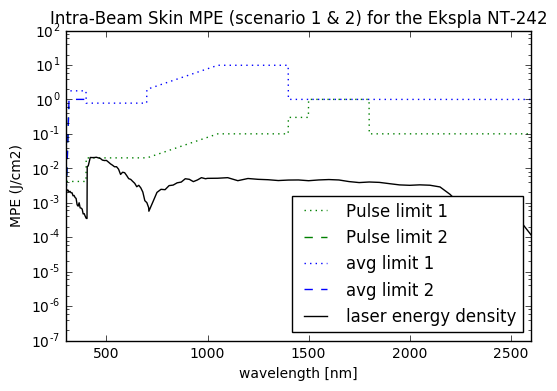

In [9]:
# Calculate MPE for skin exposure
MPEs_scenario1_skin=skin_intra_beam_MPE_calcs()

if 1 == 1:
    plt.plot(MPEs_scenario1_skin['wavelength'],MPEs_scenario1_skin['MPE_pulse_limit1'],':g',label="Pulse limit 1")
    plt.plot(MPEs_scenario1_skin['wavelength'],MPEs_scenario1_skin['MPE_pulse_limit2'],'--g',label="Pulse limit 2")
    plt.plot(MPEs_scenario1_skin['wavelength'],MPEs_scenario1_skin['MPE_avg_limit1'],':b',label="avg limit 1")
    plt.plot(MPEs_scenario1_skin['wavelength'],MPEs_scenario1_skin['MPE_avg_limit2'],'--b',label="avg limit 2")
    plt.plot(nt242_wave_nm,laser_energy_density, '-k', label="laser energy density")
    plt.title('Intra-Beam Skin MPE (scenario 1 & 2) for the Ekspla NT-242')
    plt.ylabel('MPE (J/cm2)')
    plt.xlabel('wavelength [nm]')
    #plt.text(3300, 430, 'Seeing is %.2f "' % seeing) 
    plt.legend(loc=4)
    plt.yscale('log')
    plt.ylim([1e-7,100])
    plt.xlim(300,2600)
    plt.show()
    plt.close()

#### The laser level is below the intra-beam skin MPE for all wavelengths therefore direct interaction with the beam is not a skin hazard for short durations. 

## Calculation of Nominal Hazard Distances (NOHD)

In [37]:
# These calculations are normalized for limited apertures (table 8a and 8b).
# The aperture changes according the the wavelength, but cannot be smaller than
# the actual beam size.
# pulse length is 3ns
ocular_limiting_aperture_pulse_mm=np.zeros(2600)
ocular_limiting_aperture_pulse_mm[180:400]=1.0 # [mm]
ocular_limiting_aperture_pulse_mm[400:1200]=7.0 # [mm]
ocular_limiting_aperture_pulse_mm[400:1200]=7.0 # [mm]
# limiting aperture depends on if retina or cornea damage dominates
eval=(MPEs_scenario1_intrabeam['MPE_pulse_limit1']-MPEs_scenario1_intrabeam['MPE_pulse_limit2'])[1200:1400]
ind_retina, = np.where(eval >= 0) # this is where retina damage dominates
ind_cornea, = np.where(eval < 0) # this is where cornea damage dominates
ocular_limiting_aperture_pulse_mm[ind_retina+1200]=7.0 # [mm]
ocular_limiting_aperture_pulse_mm[ind_cornea+1200]=1.0 # [mm]
ocular_limiting_aperture_pulse_mm[1400:2600]=1.0 # [mm]
#print(ind_retina+1200)

In [ ]:
# now for the average beam energy
# 100s interval 180-400, 0.25s 400-700, 10s 700-2600nm
ocular_limiting_aperture_avg_mm=np.zeros(2600)
ocular_limiting_aperture_avg_mm[180:400]=3.5 # [mm]
ocular_limiting_aperture_avg_mm[400:1200]=7.0 # [mm]
ocular_limiting_aperture_avg_mm[400:1200]=7.0 # [mm]
eval=(MPEs_scenario1_intrabeam['MPE_avg_limit1']-MPEs_scenario1_intrabeam['MPE_avg_limit2'])[1200:1400]
ind_retina, = np.where(eval >= 0) # this is where retina damage dominates
ind_cornea, = np.where(eval < 0) # this is where cornea damage dominates
ocular_limiting_aperture_avg_mm[ind_retina]=7.0 # [mm]
ocular_limiting_aperture_avg_mm[ind_cornea]=1.0 # [mm]
ocular_limiting_aperture_avg_mm[1400:2600]=3.5 # [mm]
# skin always 3.5mm until wavelengths of 100um
skin_limiting_aperture_avg_mm=np.zeros(2600)+3.5 # [mm]

In [45]:
# scenario 1 intrabeam
# This calculation is for the distance required for safe direct (intra-beam) viewing
# this follows the top formula on page 204 of the ANSI handbook
# Because the maximum pulse energy is at 420 nm, and the lowest MPE is at 420nm, 
# we only calculate this value
phi = beam_divergence_rad # beam divergence in [radians]
# beam diameter is less than the limiting aperture, therefore, we use the limiting aperture
# which is 7mm 
a = ocular_limiting_aperture_pulse_mm[420]/10 # beam diameter [cm]
Phi = max_pulse_energy_J # J at 420nm 
MPE = MPEs_scenario1_intrabeam['MPE_final'][420] # J/cm2
R_NODH_cm_scenario1 = (1.0/phi) * ( ((4.0*Phi)/(np.pi*MPE)) - a**2.0)**0.5 
print('The nominal Hazard Distance for intra-beam viewing (scenario 1) is %1.2f [m]' % (R_NODH_cm_scenario1/100))

The nominal Hazard Distance for intra-beam viewing (scenario 1) is 552.75 [m]


In [46]:
# Now consider the diffuse light from the beam hitting a diffuse surface
# Page 326 of the LIA manual states the diffuse beam MPE can be
# calculated from the intra-beam MPE. One need only calculate 
# the correction factor C_E for each of the 3 Zones.
# We follow here the example on page 331 of the LIA manual

# The MPE is dependent upon the angular size of the source.
# alpha_min (which is the angular size of 1.5 mrad which is the diffraction limit 
# of the eye [pg 324 of LIA book]),

r1_distance_mm = beam_diameter_mm/np.tan(1.5e-3) # [mm] 
#MPEs_occular_diffuse['Zone1_radius']=r1_distance_mm
# for the Ekspla-242 this is - 1180 mm for 1.77mm Ekspla beam

# so Zone1 is when the viewer is further away than r1_distance_mm
# for this C_E = 1.0, so we treat as intrabeam viewing

# calculate the non-hazard distance using equation on page 205 of ANSI
# assume straight viewing (cos(theta) = 1)
# assume diffuse reflectivity (rho = 1)

r_NOHD_diffuse_scenario1_cm = (Phi / (np.pi * MPE))**0.5
print('The nominal Hazard Distance for diffuse viewing (scenario 1) is %1.2f [m]' % (r_NOHD_diffuse_scenario1_cm/100))

# Because this distance is larger than r1_distance_mm, the NOHD is in 
# zone 1.

The nominal Hazard Distance for diffuse viewing (scenario 1) is 0.28 [m]


In [47]:
# scenario 2
# Exiting from a 0.22 NA fiber:
# Because the maximum pulse energy is at 420 nm, and the lowest MPE is at 420nm, 
# we only calculate this value

# This follows from the multimode equation on the bottom of page 204 of the ANSI book
# calculation uses scenario1 MPEs
NA=0.22
MPE = MPEs_scenario1_intrabeam['MPE_final'][420] # J/cm2
Phi = max_pulse_energy_J # J at 420nm

R_NODH_cm_scenario2 = (1.7/NA) * ( (Phi)/(np.pi*MPE) )**0.5
print('The nominal Hazard Distance in scenario 2 (fiber exit) is %1.2f [m]' % (R_NODH_cm_scenario2/100))
# R_NODH_420_fiber = (1.7/0.22) *  [ (40e-6)/(pi*2e-7) ]^0.5 = 7.727 * 7.978 = 61.646 cm = 0.61 m

# We do not calculate a diffuse NOHD because the light from 
# the fiber should only hit a diffuse surface AFTER 3 meters of travel
# therefore the person is already out of the hazard area

The nominal Hazard Distance in scenario 2 (fiber exit) is 2.14 [m]


# Calculate diffuse extended exposure from UV light